# Web Scraping with Beautiful Soup - Lab

## Introduction

Now that you've read and seen some docmentation regarding the use of Beautiful Soup, its time to practice and put that to work! In this lab you'll formalize some of our example code into functions and scrape the lyrics from an artist of your choice.

## Objectives
You will be able to:
* Scrape Static webpages
* Select specific elements from the DOM

## Link Scraping

Write a function to collect the links to each of the song pages from a given artist page.

In [8]:
#Starter Code

from bs4 import BeautifulSoup
import requests


url = 'https://www.azlyrics.com/l/lilyallen.html' #Put the URL of your AZLyrics Artist Page here!

html_page = requests.get(url) #Make a get request to retrieve the page
soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing

In [9]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- The above 3 meta tags *must* come first in the head; any other head content must come *after* these tags -->
  <meta content='Lily Allen lyrics - 83 song lyrics sorted by album, including "Fuck You (Very Much)", "Somewhere Only We Know", "Smile".' name="description"/>
  <meta content="Lily Allen, Lily Allen lyrics, discography, albums, songs" name="keywords"/>
  <meta content="noarchive" name="robots"/>
  <title>
   Lily Allen Lyrics
  </title>
  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>
  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>
  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->
  <!--[if lt IE 9]>
<script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></


In [11]:
def grab_song_links(artist_page_url):

    url = artist_page_url

    html_page = requests.get(url) #Make a get request to retrieve the page
    soup = BeautifulSoup(html_page.content, 'html.parser') #Pass the page contents to beautiful soup for parsing


    #The example from our lecture/reading
    data = [] #Create a storage container

    #Get album divs
    albums = soup.find_all("div", class_="album")
    for album_n in range(len(albums)):
        #On the last album, we won't be able to look forward
        if album_n == len(albums)-1:
            cur_album = albums[album_n]
            album_songs = cur_album.findNextSiblings('a')
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
        else:
            cur_album = albums[album_n]
            next_album = albums[album_n+1]
            saca = cur_album.findNextSiblings('a') #songs after current album
            sbna = next_album.findPreviousSiblings('a') #songs before next album
            album_songs = [song for song in saca if song in sbna] #album songs are those listed after the current album but before the next one!
            for song in album_songs:
                page = song.get('href')
                title = song.text
                album = cur_album.text
                data.append((title, page, album))
    return data

In [12]:
grab_song_links('https://www.azlyrics.com/l/lilyallen.html')

[('Smile', '../lyrics/lilyallen/smile.html', 'album: "Alright, Still" (2006)'),
 ("Knock 'Em Out",
  '../lyrics/lilyallen/knockemout.html',
  'album: "Alright, Still" (2006)'),
 ('LDN', '../lyrics/lilyallen/ldn.html', 'album: "Alright, Still" (2006)'),
 ("Everything's Just Wonderful",
  '../lyrics/lilyallen/everythingsjustwonderful.html',
  'album: "Alright, Still" (2006)'),
 ('Not Big',
  '../lyrics/lilyallen/notbig.html',
  'album: "Alright, Still" (2006)'),
 ('Friday Night',
  '../lyrics/lilyallen/fridaynight.html',
  'album: "Alright, Still" (2006)'),
 ('Shame For You',
  '../lyrics/lilyallen/shameforyou.html',
  'album: "Alright, Still" (2006)'),
 ('Littlest Things',
  '../lyrics/lilyallen/littlestthings.html',
  'album: "Alright, Still" (2006)'),
 ('Take What You Take',
  '../lyrics/lilyallen/takewhatyoutake.html',
  'album: "Alright, Still" (2006)'),
 ('Friend Of Mine',
  '../lyrics/lilyallen/friendofmine.html',
  'album: "Alright, Still" (2006)'),
 ('Alfie', '../lyrics/lilyalle

## Text Scraping
Write a secondary function that scrapes the lyrics for each song page.

In [13]:
#Remember to open up the webpage in a browser and control-click/right-click and go to inspect!
from bs4 import BeautifulSoup
import requests

#Example page
url = 'https://www.azlyrics.com/lyrics/lilyallen/sheezus.html'


html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')
soup.prettify()[:1000]

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <meta content="Lyrics to &quot;Sheezus&quot; song by Lily Allen: Been here before, so I\'m prepared Not gonna lie though, I\'m kinda scared Lace up my gloves, I\'m goin..." name="description"/>\n  <meta content="Sheezus lyrics, Lily Allen Sheezus lyrics, Lily Allen lyrics" name="keywords"/>\n  <meta content="noarchive" name="robots"/>\n  <meta content="//www.azlyrics.com/az_logo_tr.png" property="og:image"/>\n  <title>\n   Lily Allen - Sheezus Lyrics | AZLyrics.com\n  </title>\n  <link href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.4/css/bootstrap.min.css" rel="stylesheet"/>\n  <link href="//www.azlyrics.com/bsaz.css" rel="stylesheet"/>\n  <!-- HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries -->\n  <!--[if lt IE 9]>\r\n<script src="https://oss.maxcdn

In [15]:
def scrape_lyrics(song_page_url):
    html_page = requests.get(song_page_url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    main_page = soup.find('div', {"class": "container main-page"})
    main_l2 = main_page.find('div', {"class" : "row"})
    main_l3 = main_l2.find('div', {"class" : "col-xs-12 col-lg-8 text-center"})
    lyrics = main_l3.findAll('div')[6].text
    return lyrics

In [16]:
scrape_lyrics('https://www.azlyrics.com/lyrics/lilyallen/fuckyouverymuch.html')

"\n\r\nLook inside\nLook inside your tiny mind\nNow look a bit harder\n'Cause we're so uninspired, so sick and tired of all the hatred you harbor\n\nSo you say\nIt's not okay to be gay\nWell I think you're just evil\nYou're just some racist who can't tie my laces\nYour point of view is medieval\n\nFuck you\nFuck you very, very much\n'Cause we hate what you do\nAnd we hate your whole crew\nSo please don't stay in touch\n\nFuck you\nFuck you very, very much\n'Cause your words don't translate\nAnd it's getting quite late\nSo please don't stay in touch\n\nDo you get\nDo you get a little kick out of being slow-minded?\nYou want to be like your father\nIt's approval you're after\nWell that's not how you find it\n\nDo you\nDo you really enjoy living a life that's so hateful?\n'Cause there's a hole where your soul should be\nYou're losing control of it and it's really distasteful\n\nFuck you\nFuck you very, very much\n'Cause we hate what you do\nAnd we hate your whole crew\nSo please don't sta

## Synthesizing
Create a script using your two functions above to scrape all of the song lyrics for a given artist.


In [17]:
#Use this block for your code!

#Preview First Step
songs = grab_song_links("https://www.azlyrics.com/l/lilyallen.html")
print(len(songs))
print(songs[0])


86
('Smile', '../lyrics/lilyallen/smile.html', 'album: "Alright, Still" (2006)')


In [18]:
songs = grab_song_links("https://www.azlyrics.com/l/lilyallen.html")
url_base = "https://www.azlyrics.com"
lyrics = []
for song in songs:
    try:
        url_sffx = song[1].replace('..','')
        url = url_base + url_sffx
        lyr = scrape_lyrics(url)
        lyrics.append(lyr)
    except:
        lyrics.append("N/A")

In [20]:
lyrics


["\n\r\nWhen you first left me I was wanting more\nBut you were fucking that girl next door, what you do that for (what you do that for)?\nWhen you first left me I didn't know what to say\nI never been on my own that way, just sat by myself all day\n\nI was so lost back then\nBut with a little help from my friends\nI found a light in the tunnel at the end\nNow you're calling me up on the phone\nSo you can have a little whine and a moan\nAnd it's only because you're feeling alone\n\nAt first when I see you cry,\nYeah, it makes me smile, yeah, it makes me smile\nAt worst I feel bad for a while,\nBut then I just smile, I go ahead and smile\n\nWhenever you see me you say that you want me back\nAnd I tell you it don't mean jack, no, it don't mean jack\nI couldn't stop laughing, no, I just couldn't help myself\nSee you messed up my mental health I was quite unwell\n\nI was so lost back then\nBut with a little help from my friends\nI found a light in the tunnel at the end\nNow you're calling 

## Visualizing
Generate two bar graphs to compare lyrical changes for the artist of your chose. For example, the two bar charts could compare the lyrics for two different songs or two different albums.

In [22]:
#Use this block for your code!
import pandas as pd
df = pd.DataFrame(list(zip(songs, lyrics)))
df.head()


,0,1
0,"(Smile, ../lyrics/lilyallen/smile.html, album:...",\n\r\nWhen you first left me I was wanting mor...
1,"(Knock 'Em Out, ../lyrics/lilyallen/knockemout...","\n\r\nAlright so this is a song about anyone, ..."
2,"(LDN, ../lyrics/lilyallen/ldn.html, album: ""Al...",\n\r\nRiding through the city on my bike all d...
3,"(Everything's Just Wonderful, ../lyrics/lilyal...","\n\r\nDo you think, everything, everyone, is g..."
4,"(Not Big, ../lyrics/lilyallen/notbig.html, alb...",\n\r\nNow listen I think you and me have come ...


In [23]:
df['Song'] = df[0].map(lambda x: x[0])
df['Album'] = df[0].map(lambda x: x[2])
df = df.rename(columns={1:'Lyrics'})
df.head()

,0,Lyrics,Song,Album
0,"(Smile, ../lyrics/lilyallen/smile.html, album:...",\n\r\nWhen you first left me I was wanting mor...,Smile,"album: ""Alright, Still"" (2006)"
1,"(Knock 'Em Out, ../lyrics/lilyallen/knockemout...","\n\r\nAlright so this is a song about anyone, ...",Knock 'Em Out,"album: ""Alright, Still"" (2006)"
2,"(LDN, ../lyrics/lilyallen/ldn.html, album: ""Al...",\n\r\nRiding through the city on my bike all d...,LDN,"album: ""Alright, Still"" (2006)"
3,"(Everything's Just Wonderful, ../lyrics/lilyal...","\n\r\nDo you think, everything, everyone, is g...",Everything's Just Wonderful,"album: ""Alright, Still"" (2006)"
4,"(Not Big, ../lyrics/lilyallen/notbig.html, alb...",\n\r\nNow listen I think you and me have come ...,Not Big,"album: ""Alright, Still"" (2006)"


In [27]:
print(len(df.Lyrics[0]))
print(len(df.Lyrics[1]))
print(len(df.Lyrics[2]))

1625
1761
1744


In [45]:
pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]


I         27
you       16
me        14
a         12
it        10
smile      8
smile,     8
makes      8
At         8
But        7
dtype: int64

In [46]:
pd.Series(df.Lyrics.iloc[1].split()).value_counts()[:10]


a       13
the      8
you      6
I've     6
to       5
on       5
away     4
just     4
got      4
my       4
dtype: int64

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

Text(0.5,1,"Top 10 Lyrics for Knock 'Em Out")

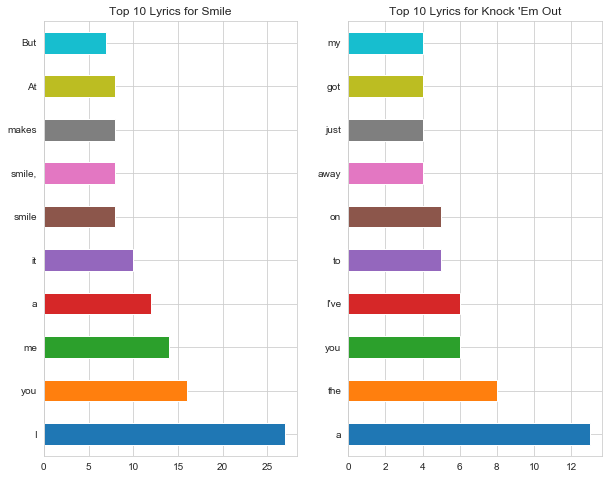

In [48]:
fig, axes = plt.subplots(1,2, figsize=(10,8))
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[0].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[0], kind='barh')
#Add Subplot Title
axes[0].set_title('Top 10 Lyrics for {}'.format(df['Song'].iloc[0]))
#Repeat
#Get top 10 words
top10 = pd.Series(df.Lyrics.iloc[1].split()).value_counts()[:10]
#Plot as bar graph
top10.plot(ax=axes[1], kind='barh')
#Add Subplot Title
axes[1].set_title('Top 10 Lyrics for {}'.format(df['Song'].iloc[1]))

## Level - Up

Think about how you structured the data from your web scraper. Did you scrape the entire song lyrics verbatim? Did you simply store the words and their frequency counts, or did you do something else entirely? List out a few different options for how you could have stored this data. What are advantages and disadvantages of each? Be specific and think about what sort of analyses each representation would lend itself to.

In [ ]:
#Use this block for your code!

## Summary

Congratulations! You've now practiced your Beautiful Soup knowledge!